# KNN (K-Nearest Neighbors)
- Mengkalsifikasikan suatu data point berdasarkan sejumlah $k$ data point tertangga terdekatnya.
    - Menghitung jarak antar data point dengan data point yang akan diklasifikasikan
    - Cari sejumlah $k$ data point terdekat dengan data point yang akan diklasifikasikan 
    
    $\Delta x = x - x_1$
    
    $\Delta y = y - y_1$
    
    $s = \sqrt{(\Delta x)^2 + (\Delta y)^2}$
    
    - Lihat mayoritas class dari $k$ data point terdekat tersebut
    - Klasifikasikan data point sesuai class mayoritas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [6]:
dfIris = pd.DataFrame(
    data['data'],
    columns = data['feature_names']
)
dfIris['target'] = data['target']
dfIris['jenis'] = dfIris['target'].apply(lambda x: data['target_names'][x])
dfIris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target      jenis  
0         0     setosa  
1         0     setosa  
2         0     setosa  
3         0     setosa  
4         0     setosa  
..      ...        ...  
145       2  virginica  
146       2  virginica  
147       2  virginica  
148       2  virginica  
149       2  virginica  

[150 rows x 6 columns]

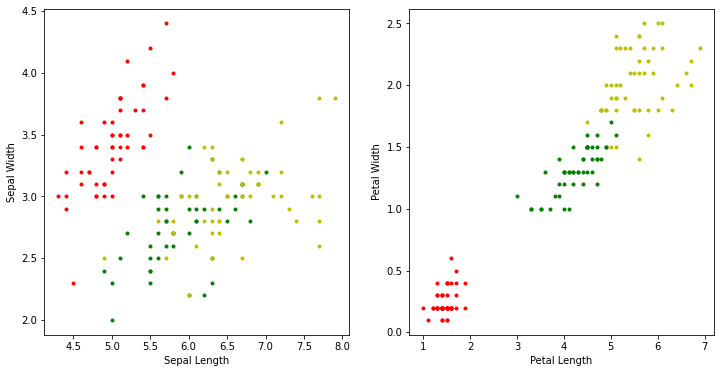

In [10]:
plt.figure(figsize =(12, 6))
plt.subplot(121)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target']==0],
    dfIris['sepal width (cm)'][dfIris['target']==0], 'r.'
)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target']==1],
    dfIris['sepal width (cm)'][dfIris['target']==1], 'g.'
)
plt.plot(
    dfIris['sepal length (cm)'][dfIris['target']==2],
    dfIris['sepal width (cm)'][dfIris['target']==2], 'y.'
)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(122)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target']==0],
    dfIris['petal width (cm)'][dfIris['target']==0], 'r.'
)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target']==1],
    dfIris['petal width (cm)'][dfIris['target']==1], 'g.'
)
plt.plot(
    dfIris['petal length (cm)'][dfIris['target']==2],
    dfIris['petal width (cm)'][dfIris['target']==2], 'y.'
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
xtr, xts, ytr, yts = train_test_split(dfIris[dfIris.columns[:4]], dfIris['target'])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
model = KNeighborsClassifier()
model.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- Default $k$ = ```n_neighbors ``` = 5
- Best $k$ Value :
    1. Hitung akar kuadrat dari jumlah $x$ training $ \sqrt{n(x_\textrm{training})} $
    2. Pilih angka yang ganjil sebagai $k$

In [23]:
def k(x) :
    k = int(np.sqrt(x))
    if k % 2 == 0:
        k += 1
        return k
    else :
        return k

In [24]:
model = KNeighborsClassifier(n_neighbors= k(len(xtr)))
model.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [25]:
model.predict(xtr)

array([0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2,
       0, 2])

In [27]:
dfIris['prediksi']= model.predict(dfIris[dfIris.columns[:4]])
dfIris[dfIris['target'] != dfIris['prediksi']]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
83                 6.0               2.7                5.1               1.6   
106                4.9               2.5                4.5               1.7   
126                6.2               2.8                4.8               1.8   

     target       jenis  prediksi  
70        1  versicolor         2  
83        1  versicolor         2  
106       2   virginica         1  
126       2   virginica         1

In [28]:
# confusion matrix untuk data target multi label

from sklearn.metrics import multilabel_confusion_matrix

In [29]:
multilabel_confusion_matrix(
    dfIris['target'], dfIris['prediksi'], labels=[0, 1, 2]
)

array([[[100,   0],
        [  0,  50]],

       [[ 98,   2],
        [  2,  48]],

       [[ 98,   2],
        [  2,  48]]], dtype=int64)

In [30]:
model.predict_proba(dfIris[dfIris.columns[:4]])

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

<hr>

### Nearest Neighbors
- Menampilkan data tetangga terdekat dari suatu data point
- ```NearestNeighbors``` me-return : __jarak__ dan __index__ data terdekat
- Data terdekat pertama == data point itu sendiri

In [35]:
from sklearn.neighbors import NearestNeighbors

In [32]:
NN = NearestNeighbors(n_neighbors = 11)
NN.fit(xtr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                 radius=1.0)

In [34]:
NN.kneighbors([xtr.iloc[0]])

(array([[0.        , 0.3       , 0.37416574, 0.41231056, 0.42426407,
         0.5       , 0.50990195, 0.51961524, 0.53851648, 0.53851648,
         0.54772256]]),
 array([[  0,  40,  61, 104,  20,  28,  75, 110,  74,  14,  87]],
       dtype=int64))